# Area 51 to try out code

In [69]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

compute-a-16-118.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


### The classic example:
Should be LL -26156.062

In [38]:
%%time
h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 0.0001, ibd_out = 0.001, ibd_jump = 0.001)
post, fwd, bwd, tot_ll = h.run_fwd_bwd()

Reference Number: 4
Memory Usage Full:
Memory Usage: 134.672384 mB
Total Log likelihood: -26085.855
CPU times: user 155 ms, sys: 1.79 ms, total: 156 ms
Wall time: 154 ms


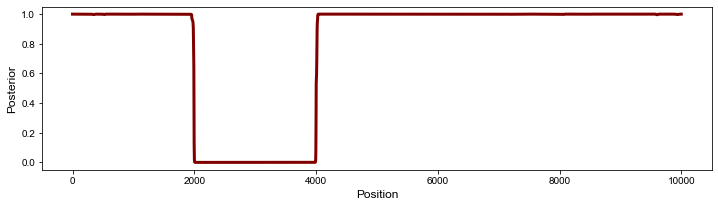

In [30]:
plot_posterior(post=post, state=0, fs_l=12, show=True)

Saved to ./figs/dumpster/5state_simulated.png


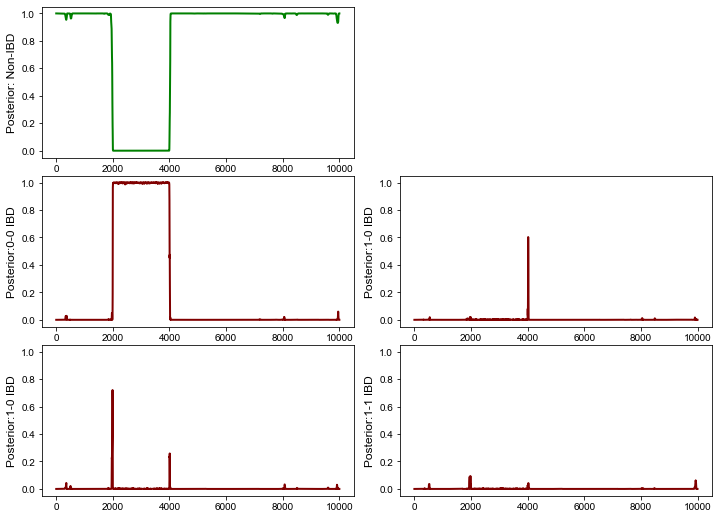

In [7]:
plot_posterior_panel(post=post, savepath="./figs/dumpster/5state_simulated.png", lw=2)

Saved to ./figs/dumpster/5state_simulated_zoom.png


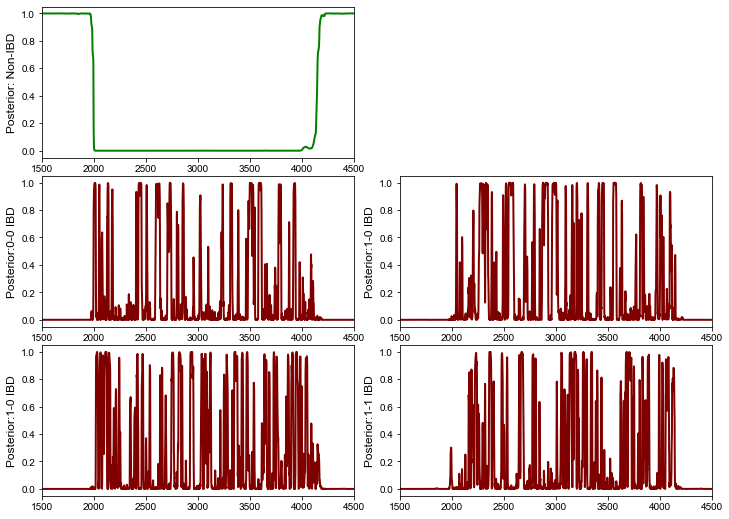

In [27]:
plot_posterior_panel(post=post, 
                     savepath="./figs/dumpster/5state_simulated_zoom.png", xlim=[1500,4500], lw=2)

# Run full hdf5 example

In [108]:
%%time
h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 1, ibd_out = 1, ibd_jump = 500)
h.l_obj.set_params(iids=["I18199", "I18201"], ch=6)
post, fwd, bwd, tot_ll = h.run_fwd_bwd()

Minimum Genetic Map: 0.0032 Morgan
Maximum Genetic Map: 1.9203 Morgan
Gaps bigger than 0.1 cM: 151
Maximum Gap: 0.5062 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 307.535872 mB
Total Log likelihood: -179017.155
CPU times: user 485 ms, sys: 11.3 ms, total: 497 ms
Wall time: 526 ms


In [88]:
np.shape(post)

(5, 94173)

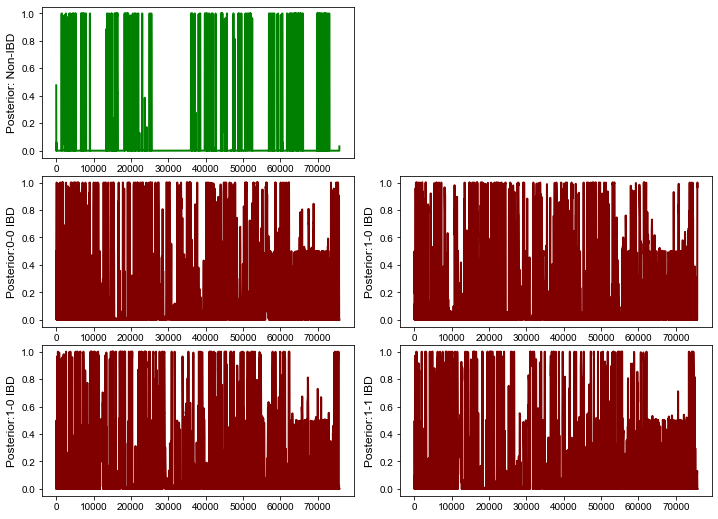

In [109]:
plot_posterior_panel(post=post, savepath="", 
                     xlim=[], lw=2)

### Test total likelihoods

In [119]:
%%time
jrts = np.logspace(2, 3, num=20)

h = HMM_Full(folder_in="./data/hdf5/1240k_v43/ch", l_model="hdf5", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=False, load=True)
lls = np.zeros(len(jrts),dtype="float")

for i,jrt in enumerate(jrts):
    h.t_obj.set_params(ibd_in = 1, ibd_out = 10, ibd_jump = jrt)
    h.l_obj.set_params(iids=["SUC002", "SUC003"], ch=4)
    _, _, _, tot_ll = h.run_fwd_bwd()
    lls[i] = tot_ll

Minimum Genetic Map: 0.0034 Morgan
Maximum Genetic Map: 2.1454 Morgan
Gaps bigger than 0.1 cM: 193
Maximum Gap: 2.0422 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 248.303616 mB
Total Log likelihood: -149694.991
Minimum Genetic Map: 0.0034 Morgan
Maximum Genetic Map: 2.1454 Morgan
Gaps bigger than 0.1 cM: 193
Maximum Gap: 2.0422 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 248.303616 mB
Total Log likelihood: -149656.655
Minimum Genetic Map: 0.0034 Morgan
Maximum Genetic Map: 2.1454 Morgan
Gaps bigger than 0.1 cM: 193
Maximum Gap: 2.0422 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 248.303616 mB
Total Log likelihood: -149619.841
Minimum Genetic Map: 0.0034 Morgan
Maximum Genetic Map: 2.1454 Morgan
Gaps bigger than 0.1 cM: 193
Maximum Gap: 2.0422 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 248.303616 mB
Total Log likelihood: -149584.

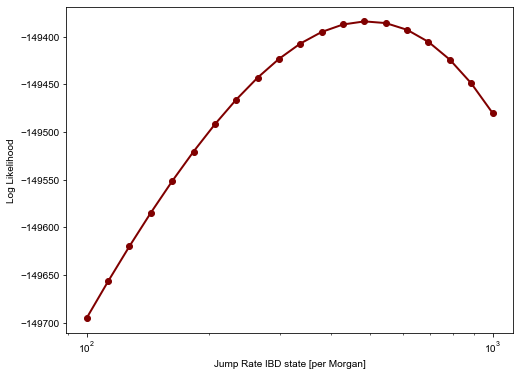

In [126]:
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.plot(jrts, lls,"o-", color="maroon", lw=2)
ax.set_xscale("log")
ax.set_xlabel("Jump Rate IBD state [per Morgan]")
ax.set_ylabel("Log Likelihood")
plt.show()

In [121]:
i=np.argmax(lls)
jrts[i]

483.2930238571752

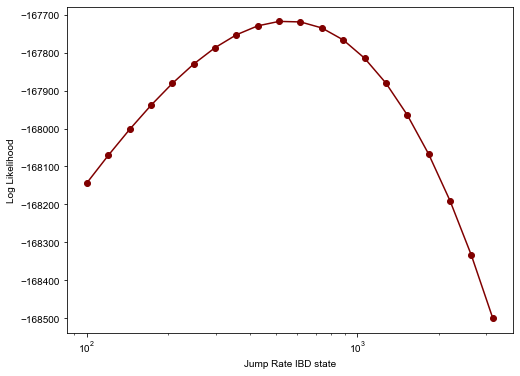

In [112]:
plt.figure(figsize=(8,6))
ax=plt.gca()
ax.plot(jrts,lls,"o-", color="maroon")
ax.set_xscale("log")
ax.set_xlabel("Jump Rate IBD state")
ax.set_ylabel("Log Likelihood")
plt.show()

In [117]:
i=np.argmax(lls)
jrts[i]

2636.650898730358